In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.offline as py
template_style = "plotly_dark"
%matplotlib inline

In [4]:
 #read the file
df = pd.read_excel('/content/drive/MyDrive/hospital_data_sampleee.xlsx')
df.head()

,Date,Medication Revenue,Lab Cost,Consultation Revenue,Doctor Type,Financial Class,Patient Type,Entry Time,Post-Consultation Time,Completion Time,Patient ID
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    29998 non-null  datetime64[ns]
 1    Medication Revenue     29998 non-null  object        
 2     Lab Cost              29998 non-null  object        
 3    Consultation Revenue   29998 non-null  object        
 4   Doctor Type             29998 non-null  object        
 5   Financial Class         29998 non-null  object        
 6   Patient Type            29998 non-null  object        
 7   Entry Time              29998 non-null  object        
 8   Post-Consultation Time  29998 non-null  object        
 9   Completion Time         29998 non-null  object        
 10  Patient ID              29998 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 2.5+ MB


In [6]:
df.shape

(29998, 11)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum().sort_values(ascending=False)

Date                      0
 Medication Revenue       0
  Lab Cost                0
 Consultation Revenue     0
Doctor Type               0
Financial Class           0
Patient Type              0
Entry Time                0
Post-Consultation Time    0
Completion Time           0
Patient ID                0
dtype: int64

In [9]:
df.nunique()

Date                         13
 Medication Revenue        4280
  Lab Cost                  200
 Consultation Revenue       241
Doctor Type                   3
Financial Class               5
Patient Type                  1
Entry Time                20628
Post-Consultation Time    21356
Completion Time           21384
Patient ID                29998
dtype: int64

In [10]:
 # making a copy before generating the waiting time
df_copy = df.copy()

In [11]:
## changing the names forms
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("-","_" )

In [12]:
df.head()

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,08:35:45,09:17:54,09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,19:19:16,21:02:36,21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,10:46:52,11:56:25,12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,09:38:34,10:55:50,10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,11:16:21,12:06:49,12:06:54,C10005


In [13]:
df.date.value_counts().sort_index()

2019-11-01    2518
2019-11-02    1471
2019-11-03    1301
2019-11-04    3365
2019-11-05    2798
2019-11-06    2813
2019-11-07    2673
2019-11-08    2405
2019-11-09    1539
2019-11-10    1248
2019-11-11    3617
2019-11-12    2892
2019-11-13    1358
Name: date, dtype: int64

In [14]:
df.medication_revenue.value_counts()

 $-       11936
7.48        149
5           129
17          126
8.5         118
          ...  
56.62         1
56.6          1
56.52         1
56.5          1
41.34         1
Name: medication_revenue, Length: 4280, dtype: int64

In [15]:
df.lab_cost.value_counts()

 $-       28565
10          191
8           138
28.04        96
15           90
          ...  
37            1
48.15         1
107           1
101           1
9.5           1
Name: lab_cost, Length: 200, dtype: int64

In [16]:
df.consultation_revenue.value_counts()

 $-       5576
13        4762
12        3158
15        2509
24.3      1033
          ... 
23.36        1
52           1
35.13        1
17.76        1
14.5         1
Name: consultation_revenue, Length: 241, dtype: int64

In [17]:
df.doctor_type.value_counts()

ANCHOR      21913
LOCUM        6789
FLOATING     1296
Name: doctor_type, dtype: int64

In [18]:
df.financial_class.value_counts()

INSURANCE    9931
PRIVATE      9121
CORPORATE    6915
HMO          3738
MEDICARE      293
Name: financial_class, dtype: int64

In [19]:
df.patient_type.value_counts()

OUTPATIENT    29998
Name: patient_type, dtype: int64

In [20]:
df.entry_time.value_counts()

18:07:47    9
18:02:40    7
10:29:55    7
08:39:21    7
10:59:54    7
           ..
18:53:26    1
14:23:33    1
16:08:18    1
16:29:46    1
13:58:57    1
Name: entry_time, Length: 20628, dtype: int64

In [21]:
df.post_consultation_time.value_counts()

11:44:23    6
10:32:26    6
11:04:16    6
11:45:35    6
11:11:20    6
           ..
21:05:23    1
13:09:24    1
14:19:54    1
18:40:57    1
14:13:21    1
Name: post_consultation_time, Length: 21356, dtype: int64

In [22]:
df.completion_time.value_counts()

10:04:33    7
10:12:54    7
10:20:45    6
10:04:23    6
09:51:23    6
           ..
18:38:03    1
11:31:34    1
12:55:16    1
09:02:37    1
14:19:02    1
Name: completion_time, Length: 21384, dtype: int64

In [23]:
df.patient_id.value_counts()

C10001    1
C29995    1
C30007    1
C30006    1
C30005    1
         ..
C19996    1
C19995    1
C19994    1
C19993    1
C39999    1
Name: patient_id, Length: 29998, dtype: int64

In [24]:
df.dtypes

date                      datetime64[ns]
medication_revenue                object
lab_cost                          object
consultation_revenue              object
doctor_type                       object
financial_class                   object
patient_type                      object
entry_time                        object
post_consultation_time            object
completion_time                   object
patient_id                        object
dtype: object

We don't have the data for patient time waiting, so let's add the timing by sub 'entry time' - 'completion time' and We cant sub two dates.time so we need to change 'entry_time' , 'post_consultation_time' , 'completion_time' to_timedelta

In [25]:
#converting the times to datatime datatype to generate the waiting time
df.completion_time = pd.to_timedelta(df.completion_time.astype(str))
df.entry_time = pd.to_timedelta(df.entry_time.astype(str))
df.post_consultation_time = pd.to_timedelta(df.post_consultation_time.astype(str))

In [26]:
df.dtypes

date                       datetime64[ns]
medication_revenue                 object
lab_cost                           object
consultation_revenue               object
doctor_type                        object
financial_class                    object
patient_type                       object
entry_time                timedelta64[ns]
post_consultation_time    timedelta64[ns]
completion_time           timedelta64[ns]
patient_id                         object
dtype: object

In [27]:
df

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005
...,...,...,...,...,...,...,...,...,...,...,...
29993,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:24,0 days 14:08:56,0 days 14:15:42,C39995
29994,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:33,0 days 14:21:17,0 days 14:21:53,C39996
29995,2019-11-13,$-,$-,$-,ANCHOR,PRIVATE,OUTPATIENT,0 days 14:01:41,0 days 14:13:57,0 days 14:16:29,C39997
29996,2019-11-13,$-,$-,$-,LOCUM,CORPORATE,OUTPATIENT,0 days 14:01:42,0 days 14:13:21,0 days 14:13:22,C39998


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   date                    29998 non-null  datetime64[ns] 
 1   medication_revenue      29998 non-null  object         
 2   lab_cost                29998 non-null  object         
 3   consultation_revenue    29998 non-null  object         
 4   doctor_type             29998 non-null  object         
 5   financial_class         29998 non-null  object         
 6   patient_type            29998 non-null  object         
 7   entry_time              29998 non-null  timedelta64[ns]
 8   post_consultation_time  29998 non-null  timedelta64[ns]
 9   completion_time         29998 non-null  timedelta64[ns]
 10  patient_id              29998 non-null  object         
dtypes: datetime64[ns](1), object(7), timedelta64[ns](3)
memory usage: 2.5+ MB


In [29]:
df.head()

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005


In [30]:
# new column for Calculator 'waiting_time'
df['waiting_time'] = df['completion_time'] - df['entry_time']

# new column for Calculator 'waiting_per_minutes'
df['waiting_per_minutes'] = df.waiting_time.dt.seconds / 60
df['waiting_per_minutes'] = df['waiting_per_minutes'].round(0)

# new column for extract 'weekday' from 'date'
# new column for extract the  'hours' from 'entry_time'
df['weekday'] = df.date.dt.strftime('%A')
df['hours'] = df.entry_time.dt.components.hours
df.head()

,date,medication_revenue,lab_cost,consultation_revenue,doctor_type,financial_class,patient_type,entry_time,post_consultation_time,completion_time,patient_id,waiting_time,waiting_per_minutes,weekday,hours
0,2019-11-04,1183.22,10,20.17,ANCHOR,HMO,OUTPATIENT,0 days 08:35:45,0 days 09:17:54,0 days 09:29:46,C10001,0 days 00:54:01,54.0,Monday,8
1,2019-11-06,738.48,$-,15,ANCHOR,INSURANCE,OUTPATIENT,0 days 19:19:16,0 days 21:02:36,0 days 21:24:07,C10002,0 days 02:04:51,125.0,Wednesday,19
2,2019-11-02,660,$-,21.17,ANCHOR,HMO,OUTPATIENT,0 days 10:46:52,0 days 11:56:25,0 days 12:06:28,C10003,0 days 01:19:36,80.0,Saturday,10
3,2019-11-06,600,$-,$-,ANCHOR,MEDICARE,OUTPATIENT,0 days 09:38:34,0 days 10:55:50,0 days 10:58:02,C10004,0 days 01:19:28,79.0,Wednesday,9
4,2019-11-01,591.6,$-,12,ANCHOR,INSURANCE,OUTPATIENT,0 days 11:16:21,0 days 12:06:49,0 days 12:06:54,C10005,0 days 00:50:33,51.0,Friday,11


In [31]:
df.patient_type.value_counts()

OUTPATIENT    29998
Name: patient_type, dtype: int64

In [32]:
df.financial_class.value_counts()

INSURANCE    9931
PRIVATE      9121
CORPORATE    6915
HMO          3738
MEDICARE      293
Name: financial_class, dtype: int64

In [33]:
# Groupby as a function
def grouped_data(column_name):
    '''
    Groupby column and return DataFrame
    Input: Column Name
    '''
    df_tmp = df.groupby(column_name)[['waiting_per_minutes']].mean().round(0)
    df_tmp2 = df[column_name].value_counts()      #this for concat

    pivot_F = pd.concat([df_tmp, df_tmp2.rename('number_of_patient')],axis=1)
    pivot_F.reset_index(inplace=True)
    pivot_F = pivot_F.rename(columns={'index': column_name })
    return pivot_F

answer1 =  grouped_data('financial_class')
answer2 =  grouped_data('weekday')
print(answer1 , answer2)

  financial_class  waiting_per_minutes  number_of_patient
0       CORPORATE                 46.0               6915
1             HMO                 46.0               3738
2       INSURANCE                 44.0               9931
3        MEDICARE                 58.0                293
4         PRIVATE                 40.0               9121      weekday  waiting_per_minutes  number_of_patient
0     Friday                 42.0               4923
1     Monday                 49.0               6982
2   Saturday                 43.0               3010
3     Sunday                 33.0               2549
4   Thursday                 42.0               2673
5    Tuesday                 42.0               5690
6  Wednesday                 47.0               4171


In [34]:
def grouped_data2(column_name):
    if column_name == 'completion_time':
        answer = pd.pivot_table(df, index='hours',
                                columns=['weekday'], aggfunc= 'count')
        answer.drop(answer.iloc[: , 7:], axis=1, inplace=True)
    elif column_name == 'waiting_per_minutes':
        answer = pd.pivot_table(df, index='hours',
                                columns=['weekday'] , aggfunc= 'mean').round(1)
    else:
        return(column_name + " is not in the columns")

    answer = answer[column_name]
    answer = answer.fillna(0)
    answer = answer[['Sunday', 'Monday', 'Tuesday',
                  'Wednesday', 'Thursday',
                  'Friday', 'Saturday']]
    return answer
answer3 =  grouped_data2('completion_time')
answer4 =  grouped_data2('waiting_per_minutes')
print(answer3,answer4)

weekday  Sunday  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday
hours                                                                  
7           1.0     0.0      4.0        5.0       1.0     0.0       1.0
8         269.0   768.0    639.0      554.0     295.0   546.0     418.0
9         398.0   930.0    735.0      709.0     357.0   607.0     561.0
10        421.0   775.0    571.0      641.0     241.0   511.0     520.0
11        390.0   644.0    546.0      499.0     254.0   537.0     436.0
12        184.0   270.0    236.0      235.0     108.0   225.0     188.0
13         55.0   101.0     76.0       66.0      30.0    68.0      30.0
14        113.0   825.0    687.0      384.0     286.0   596.0     139.0
15         97.0   491.0    392.0      203.0     181.0   381.0     102.0
16         58.0   349.0    257.0      135.0     155.0   245.0      50.0
17         14.0    55.0     55.0       12.0      21.0    47.0      15.0
18        179.0   730.0    531.0      293.0     286.0   423.0   

<ipython-input-34-3d314ead73ed>:7: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



In [35]:
def morining(colmun_n):
    ddf = df[['entry_time' , 'post_consultation_time' , 'completion_time' , 'waiting_per_minutes']].sort_values(by= colmun_n ).head(10)
    return ddf

In [36]:
morining('entry_time').head()

,entry_time,post_consultation_time,completion_time,waiting_per_minutes
570,0 days 07:53:25,0 days 08:29:46,0 days 08:49:16,56.0
22590,0 days 07:55:06,0 days 08:22:58,0 days 08:31:59,37.0
16535,0 days 07:57:50,0 days 08:47:39,0 days 08:49:01,51.0
29447,0 days 07:58:08,0 days 08:13:19,0 days 08:16:34,18.0
25745,0 days 07:58:09,0 days 08:30:44,0 days 08:31:55,34.0


In [37]:
df.shape

(29998, 15)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29998 entries, 0 to 29997
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   date                    29998 non-null  datetime64[ns] 
 1   medication_revenue      29998 non-null  object         
 2   lab_cost                29998 non-null  object         
 3   consultation_revenue    29998 non-null  object         
 4   doctor_type             29998 non-null  object         
 5   financial_class         29998 non-null  object         
 6   patient_type            29998 non-null  object         
 7   entry_time              29998 non-null  timedelta64[ns]
 8   post_consultation_time  29998 non-null  timedelta64[ns]
 9   completion_time         29998 non-null  timedelta64[ns]
 10  patient_id              29998 non-null  object         
 11  waiting_time            29998 non-null  timedelta64[ns]
 12  waiting_per_minutes     29998 no

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Feature selection
features = ['patient_type', 'financial_class', 'weekday', 'hours']
X = pd.get_dummies(df[features], drop_first=True)
y = df['waiting_per_minutes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on testing set
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse}")

Mean squared error: 1835.8682399184986


In [41]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 42.847033035188076


In [42]:
import pickle

# Save the trained KMeans model to Google Drive
with open('/content/drive/MyDrive/model.pkl', 'wb') as f:
    pickle.dump(LinearRegression, f)

In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Feature selection
features = ['patient_type', 'financial_class', 'weekday', 'hours']
X = pd.get_dummies(df[features], drop_first=True)
y = df['waiting_per_minutes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on testing set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 42.79827257573306


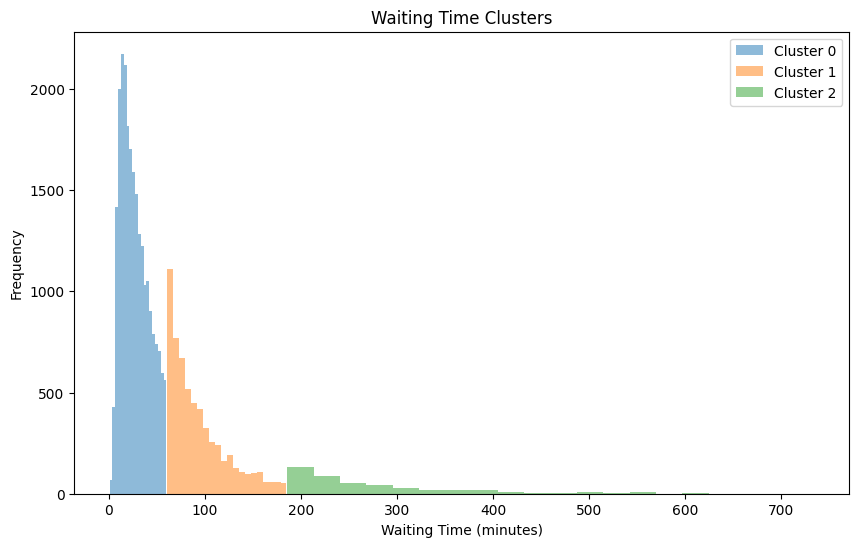

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Feature selection
features = ['patient_type', 'financial_class', 'weekday', 'hours', 'waiting_per_minutes']
X = pd.get_dummies(df[features], drop_first=True)

# Initialize and fit KMeans clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Add cluster labels to the original dataframe
df['cluster'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 6))
for cluster in sorted(df['cluster'].unique()):
    cluster_data = df[df['cluster'] == cluster]
    plt.hist(cluster_data['waiting_per_minutes'], bins=20, alpha=0.5, label=f'Cluster {cluster}')
plt.xlabel('Waiting Time (minutes)')
plt.ylabel('Frequency')
plt.title('Waiting Time Clusters')
plt.legend()
plt.show()

In [45]:
import pickle

# Save the trained KMeans model to Google Drive
with open('/content/drive/MyDrive/kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)